In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_utils
import sys
sys.path.append('/home/ghost-083/Research/1_Transfer_RL/D3M/')

# latex font
plt.rcParams.update({
"text.usetex": True,
"font.family": "sans-serif",
"font.sans-serif": "Helvetica",
})


plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

In [4]:
# from scipy.signal import savgol_filter

# def smooth(y, window=11, poly_order=3):
#     y_smooth = savgol_filter(y, window, poly_order)
#     return y_smooth


# # get statistics of saved arrays
# def get_stat(*args, window=10):
#     """
#     each input argument is in shape (100, 10)
#     """
#     means, stds = [], []
#     for k in args:
#         mean = smooth(np.mean(k, 1), window=window)
#         std = smooth(np.std(k, 1), window=window)
#         means.append(mean)
#         stds.append(std)
#     return means, stds

# # load data
# d1 = np.load(f'data/pendulum/pendulum_apt_g_12.0/test_ep_ret_cache.npy')
# d2 = np.load(f'data/pendulum/pendulum_apt_g_14.0/test_ep_ret_cache.npy')
# d3 = np.load(f'data/pendulum/pendulum_apt_g_16.0/test_ep_ret_cache.npy')


# d4 = np.load(f'data/pendulum/pendulum_apt_fixed_g_12.0/test_ep_ret_cache.npy')
# d5 = np.load(f'data/pendulum/pendulum_apt_fixed_g_14.0/test_ep_ret_cache.npy')
# d6 = np.load(f'data/pendulum/pendulum_apt_fixed_g_16.0/test_ep_ret_cache.npy')

# d7 = np.load(f'data/pendulum/pendulum_sac_g_12.0/test_ep_ret_cache.npy')
# d8 = np.load(f'data/pendulum/pendulum_sac_g_14.0/test_ep_ret_cache.npy')
# d9 = np.load(f'data/pendulum/pendulum_sac_g_16.0/test_ep_ret_cache.npy')


# # calculate statistics from data
# means, stds = get_stat(d1, d2, d3, d4, d5, d6, d7, d8, d9, window=20)

# plt.plot(means[0])

In [5]:
# load data
d1 = np.load(f'data/pendulum/pendulum_apt_g_12.0/test_ep_ret_cache.npy')
d2 = np.load(f'data/pendulum/pendulum_apt_g_14.0/test_ep_ret_cache.npy')
d3 = np.load(f'data/pendulum/pendulum_apt_g_16.0/test_ep_ret_cache.npy')


d4 = np.load(f'data/pendulum/pendulum_apt_fixed_g_12.0/test_ep_ret_cache.npy')
d5 = np.load(f'data/pendulum/pendulum_apt_fixed_g_14.0/test_ep_ret_cache.npy')
d6 = np.load(f'data/pendulum/pendulum_apt_fixed_g_16.0/test_ep_ret_cache.npy')

d7 = np.load(f'data/pendulum/pendulum_sac_g_12.0/test_ep_ret_cache.npy')
d8 = np.load(f'data/pendulum/pendulum_sac_g_14.0/test_ep_ret_cache.npy')
d9 = np.load(f'data/pendulum/pendulum_sac_g_16.0/test_ep_ret_cache.npy')


# calculate statistics from data
means, stds = plot_utils.get_stat(d1, d2, d3, d4, d5, d6, d7, d8, d9, window=20)
means = np.array(means)[:, 10:]
stds = np.array(stds)[:, 10:]

apts_v1 = {'means': [means[0, :], means[1, :], means[2, :]], 
        'stds': [stds[0, :], stds[1, :], stds[2, :]]}

apts_v2 = {'means': [means[3, :], means[4, :], means[5, :]], 
        'stds': [stds[4, :], stds[4, :], stds[5, :]]}

sacs = {'means': [means[6, :], means[7, :], means[8, :]], 
        'stds': [stds[6, :], stds[7, :], stds[8, :]]}

# calculate evaluation of zero-shot trained policy
g1 = np.load('data/pendulum/pendulum_eval_12.0/eval_policy_rewards.npy')
v1 = np.mean(np.sum(g1, 1))

g2 = np.load('data/pendulum/pendulum_eval_14.0/eval_policy_rewards.npy')
v2 = np.mean(np.sum(g2, 1))

g3 = np.load('data/pendulum/pendulum_eval_16.0/eval_policy_rewards.npy')
v3 = np.mean(np.sum(g3, 1))

baselines = [v1, v2, v3]

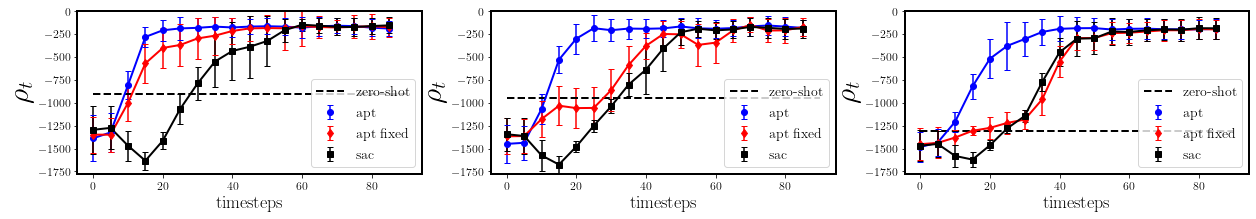

In [8]:
plot_utils.plot_avg_ret(apts_v1, apts_v2, sacs=sacs, baselines=baselines, labels=['apt', 'apt fixed', 'sac'], 
                        colors=['blue', 'red', 'black'], fmt=['o', 'd', 's'], fig_name='ppt_pendulum_plot_3')


In [9]:
# --------- calculate tau ------------
tau10 = d1 - d7
tau20 = d2 - d8
tau30 = d3 - d9

# tau10 = tau10 / max(np.max(tau10), np.max(tau20), np.max(tau30))
# tau20 = tau20 / max(np.max(tau10), np.max(tau20), np.max(tau30))
# tau30 = tau30 / max(np.max(tau10), np.max(tau20), np.max(tau30))

tau_means, tau_stds = plot_utils.get_stat(tau10, tau20, tau30, window=20)
ta_means, tau_stds = np.array(means)[:, 10:], np.array(stds)[:, 10:]

# ------------------
# load data
adv1 = np.load('data/pendulum/pendulum_apt_fixed_g_12.0/adv.npy')
adv2 = np.load('data/pendulum/pendulum_apt_fixed_g_14.0/adv.npy')
adv3 = np.load('data/pendulum/pendulum_apt_fixed_g_16.0/adv.npy')

adv4 = np.load('data/pendulum/pendulum_apt_g_12.0/adv.npy')
adv5 = np.load('data/pendulum/pendulum_apt_g_14.0/adv.npy')
adv6 = np.load('data/pendulum/pendulum_apt_g_16.0/adv.npy')

# smooth using fixed moving window size
s1 = plot_utils.smooth(adv1, window=200)
s2 = plot_utils.smooth(adv2, window=200)
s3 = plot_utils.smooth(adv3, window=200)

s4 = plot_utils.smooth(adv4, window=200)
s5 = plot_utils.smooth(adv5, window=200)
s6 = plot_utils.smooth(adv6, window=200)

tau_stat = {'means': tau_means, 'stds': tau_stds[0]}
labels = [r'$\Xi_{\mathcal{S}, \mathcal{T}_1} = .043$', r'$\Xi_{\mathcal{S}, \mathcal{T}_2} = .109$', 
        r'$\Xi_{\mathcal{S}, \mathcal{T}_3} = 0.22$']
colors = ['red', 'teal', 'blue']

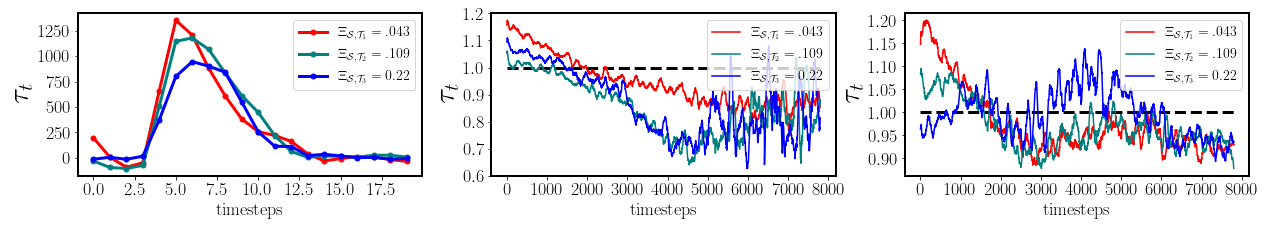

In [10]:
plot_utils.plot_adv(s1, s2, s3, s4, s5, s6, tau_stat=tau_stat, labels=labels, colors=colors, fig_name='pendulum_plot_4')
